# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
!pip install tomotopy
!pip install little_mallet_wrapper

import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 38.6 MB/s eta 0:00:00


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [2]:
# Q2 (code)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load Sanders' tweets dataset
sanders_tweets = pd.read_csv("/content/drive/MyDrive/Assignment3-AD/sanders_tweets.csv")

# Load Trump's tweets dataset
trump_tweets = pd.read_csv("/content/drive/MyDrive/Assignment3-AD/trump_tweets.csv")

# Concatenate datasets
combined = pd.concat([sanders_tweets, trump_tweets], ignore_index=True)

# Display the combined dataframe
print(combined.head())

     Username              TweetId                           Title  \
0  SenSanders  1351670845639421952  SenSanders_1351670845639421952   
1  SenSanders  1351259762722279424  SenSanders_1351259762722279424   
2  SenSanders  1351242822293319680  SenSanders_1351242822293319680   
3  SenSanders  1350885541911400448  SenSanders_1350885541911400448   
4  SenSanders  1349880150041780224  SenSanders_1349880150041780224   

                                             Content  
0  Wealth increase in past 10 months:\n⬆️$173 bil...  
1  Amidst massive income and wealth inequality te...  
2  “We now have the resources, we now have the sk...  
3  After surviving an attempt on his life, Russia...  
4  President-Elect Biden's COVID rescue plan will...  


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [22]:
# Q3 (code)
# Download and define stopwords
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import nltk
nltk.download('punkt')

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Remove URLs and user mentions
    text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', text, flags=re.MULTILINE)
    # Tokenize
    word_tokens = word_tokenize(text)
    # Remove stopwords
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

combined['Cleaned_Content'] = combined['Content'].apply(clean_text)

# Create lists
training_data = combined['Cleaned_Content'].tolist()
original_texts = combined['Content'].tolist()
titles = combined['Title'].tolist()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [23]:
# Q4 (code)
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.545103429645662
Iteration: 10	Log-likelihood: -9.160418248461607
Iteration: 20	Log-likelihood: -8.966830006854579
Iteration: 30	Log-likelihood: -8.869023085308182
Iteration: 40	Log-likelihood: -8.808055516375266
Iteration: 50	Log-likelihood: -8.76133330177718
Iteration: 60	Log-likelihood: -8.725622810620496
Iteration: 70	Log-likelihood: -8.697956465176818
Iteration: 80	Log-likelihood: -8.67444797517007
Iteration: 90	Log-likelihood: -8.657032443710083


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [ ]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

In [24]:
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())

for topic_number, topic_words in enumerate(topic_individual_words):
    print(f"Topic {topic_number}\n\n{' '.join(topic_words[:10])}\n")

Topic 0

co rt coronavirus covid amp hurricane help small businesses whitehouse

Topic 1

great co vote endorsement total state amp strong thank military

Topic 2

co must people change american climate us country together stand

Topic 3

jobs china u great amp years economy ever trade country

Topic 4

co rt thank great today whitehouse president honor live day

Topic 5

news fake media amp people foxnews cnn even like never

Topic 6

co biden trump rt joe president war twitter com u

Topic 7

co rt trump president american america thank maga americans teamtrump

Topic 8

tax co workers people working trump billion americans pay wage

Topic 9

law people co police public federal enforcement free must country

Topic 10

great united states president many good amp korea north look

Topic 11

health care co people right drug americans must every country

Topic 12

election court democrats win vote amp republican never house people

Topic 13

rt trump fbi president co russia impeachment a

In [ ]:
# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?


**Q5b:**

Topic 0: This topic seems to focus on issues related to the coronavirus pandemic, COVID-19, hurricanes, and assistance to small businesses, possibly indicating discussions about government responses to crises and economic support during disasters.

Topic 1: This topic appears to revolve around themes such as voting, endorsements, state-level activities, and military appreciation, suggesting discussions related to political campaigns, endorsements, and military affairs.

Topic 2: This topic likely pertains to topics such as climate change, societal change, and national unity, indicating discussions about environmental issues, societal transformations, and calls for unity in addressing common challenges.

Topic 3: This topic seems to center on discussions related to jobs, the economy, trade relations with China, and economic growth over time, reflecting debates about economic policies, trade agreements, and job creation efforts.

Topic 4: This topic may involve discussions about gratitude, honor, and presidential activities, suggesting expressions of appreciation, commemorations, and presidential initiatives or events.

Topic 5: This topic likely concerns discussions about media credibility, including references to fake news, mainstream media outlets like Fox News and CNN, and skepticism towards media narratives.

Topic 6: This topic appears to involve discussions about the rivalry between Joe Biden and Donald Trump, including references to their presidency, Twitter activity, and possibly electoral dynamics.

Topic 7:  This topic seems to focus on expressions of support for President Trump, American identity, and the Make America Great Again (MAGA) movement, indicating sentiments of patriotism and loyalty to the president.

Topic 8: This topic likely pertains to discussions about taxation, workers' rights, income disparities, and wage issues, reflecting debates about tax policies, labor rights, and income inequality.

Topic 9: This topic may involve discussions about law enforcement, public safety, and civil liberties, indicating debates about policing practices, law enforcement policies, and individual freedoms.

Topic 10:  This topic seems to involve discussions about the United States, the presidency, international relations, and possibly North Korea, suggesting discussions about national leadership, foreign policy, and geopolitical affairs.

Topic 11: This topic likely concerns discussions about healthcare, rights to healthcare, pharmaceuticals, and healthcare access, reflecting debates about healthcare policies, access to medical treatment, and healthcare reform.

Topic 12: This topic appears to revolve around electoral processes, court rulings, political parties, and voter behavior, indicating discussions about elections, judicial decisions, and political party dynamics.

Topic 13: This topic may involve discussions about President Trump, the FBI, Russia, impeachment, and Democratic opposition, reflecting debates about investigations, political controversies, and allegations of collusion.

Topic 14: This topic likely concerns discussions about immigration, border security, political divisions, and party priorities, indicating debates about immigration policies, border enforcement, and partisan differences in policy agendas.


## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [34]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.23841330302801603 
Per Topic: [0.21544214747846127, 0.20135782919824124, 0.2621381735894829, 0.2726495934650302, 0.26213816539384427, 0.2013578288257122, 0.2621381651144475, 0.21544215586036444, 0.22567924559116365, 0.2919271135702729, 0.23871559774270282, 0.215442162938416, 0.2396939281374216, 0.2333618450909853, 0.23871559342369436]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

In [ ]:
# Q6 (words)


**Q6:**


Initially, the model was trained with 15 topics, and the coherence score obtained was 0.23841330302801603.

After making changes to the number of topics, the coherence scores obtained for different configurations were as follows:

With fewer topics:
Number of topics: 10
Coherence score: 0.2919271135702729

With the initial model having 15 topics, the average coherence score is approximately 0.238. This indicates that there is some level of coherence among the topics in the model, although it's not very high.

When reducing the number of topics to 10, the coherence score slightly improves to 0.292. This suggests that reducing the number of topics may enhance the coherence among them. Having fewer topics could result in clearer and more coherent topic clusters.

Therefore, based on these results, it can be concluded that reducing the number of topics may yield clearer and more coherent topic clusters in this scenario. However, the optimal number of topics depends on the characteristics of the data and the requirements for interpreting the topics. It's essential to maintain coherence while ensuring the meaningfulness and interpretability of the topics.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

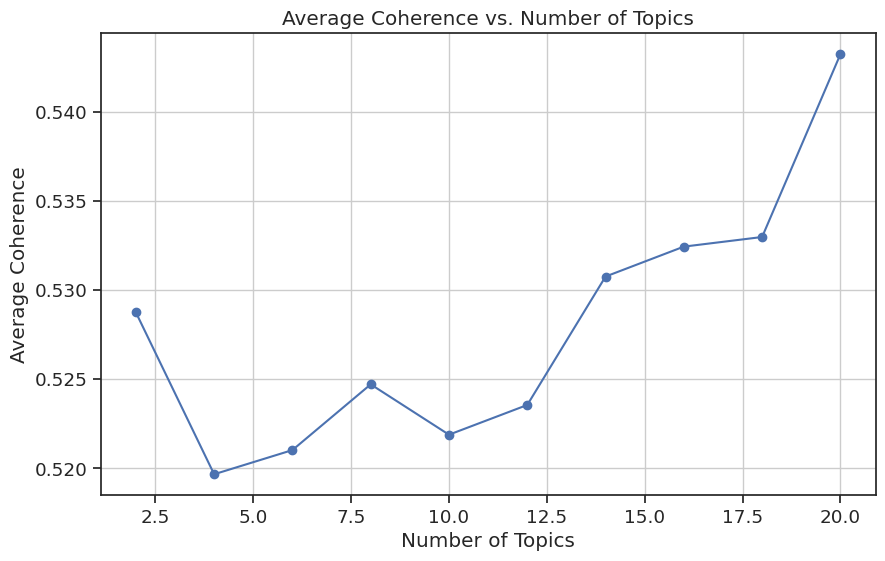

In [39]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model

import matplotlib.pyplot as plt

def plot_coherence(model, coherence_metric='c_v', start=2, end=10, step=1):
    coherence_scores = []
    num_topics_list = []

    for num_topics in range(start, end + 1, step):
        # Train the LDA model with the current number of topics
        model.train(num_topics)

        # Calculate coherence score
        coh = tp.coherence.Coherence(model, coherence=coherence_metric)
        average_coherence = coh.get_score()

        # Store coherence score and corresponding number of topics
        coherence_scores.append(average_coherence)
        num_topics_list.append(num_topics)

    # Plot the average coherence scores against the number of topics
    plt.figure(figsize=(10, 6))
    plt.plot(num_topics_list, coherence_scores, marker='o')
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.grid(True)
    plt.show()

plot_coherence(model, coherence_metric='c_v', start=2, end=20, step=2)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [71]:
# Q7a (code)
# Calculate the topic distributions for all tweets
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
topic_distributions[32]

[0.0023546484,
 0.049270928,
 0.77108556,
 0.003642571,
 0.0035509903,
 0.0030291965,
 0.0044211717,
 0.0059009837,
 0.0033795342,
 0.0037231615,
 0.048293076,
 0.09051542,
 0.004317541,
 0.0020289153,
 0.004486339]

In [55]:
# Get the top documents for some topics that could be more representative of Sanders or Trump.
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [64]:
get_top_docs(titles, topic_distributions, topic_index=0, n=5)

### ✨Topic 0✨

co rt coronavirus covid amp hurricane help small businesses whitehouse



---


✨  
**Topic Probability**: 0.9515911340713501  
**Document**: @realDonaldTrump_1168137989618315264



✨  
**Topic Probability**: 0.9515911340713501  
**Document**: @realDonaldTrump_1050005069234692096



✨  
**Topic Probability**: 0.9498264193534851  
**Document**: @realDonaldTrump_1169578377352765440



✨  
**Topic Probability**: 0.9479281902313232  
**Document**: @realDonaldTrump_1169815875966210049



✨  
**Topic Probability**: 0.9412612915039062  
**Document**: @realDonaldTrump_938422792080457731



In [79]:
get_top_docs(titles, topic_distributions, topic_index=12, n=5)

### ✨Topic 12✨

election court democrats win vote amp republican never house people



---


✨  
**Topic Probability**: 0.9576748013496399  
**Document**: @realDonaldTrump_1306799471741693952



✨  
**Topic Probability**: 0.9547986388206482  
**Document**: @realDonaldTrump_1043159406685212672



✨  
**Topic Probability**: 0.9532088041305542  
**Document**: @realDonaldTrump_938797056440889344



✨  
**Topic Probability**: 0.9476891160011292  
**Document**: @realDonaldTrump_1258876896542101504



✨  
**Topic Probability**: 0.9406930208206177  
**Document**: @realDonaldTrump_1108559080204001280



In [83]:
get_top_docs(titles, topic_distributions, topic_index=3, n=5)

### ✨Topic 3✨

jobs china u great amp years economy ever trade country



---


✨  
**Topic Probability**: 0.957171618938446  
**Document**: SenSanders_1295464379220201472



✨  
**Topic Probability**: 0.9526525139808655  
**Document**: SenSanders_1093919758825807872



✨  
**Topic Probability**: 0.9399879574775696  
**Document**: SenSanders_1080278721045647360



✨  
**Topic Probability**: 0.9371877908706665  
**Document**: SenSanders_1014967083136929792



✨  
**Topic Probability**: 0.9227743148803711  
**Document**: SenSanders_798346463386341376



In [88]:
get_top_docs(titles, topic_distributions, topic_index=10, n=5)

### ✨Topic 10✨

great united states president many good amp korea north look



---


✨  
**Topic Probability**: 0.9599176645278931  
**Document**: SenSanders_1143272727719137280



✨  
**Topic Probability**: 0.9586424231529236  
**Document**: SenSanders_1223295418009837568



✨  
**Topic Probability**: 0.9558320045471191  
**Document**: SenSanders_1030121454577311744



✨  
**Topic Probability**: 0.9526118040084839  
**Document**: SenSanders_963133323597017088



✨  
**Topic Probability**: 0.9508188962936401  
**Document**: SenSanders_1095730067886489600



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [ ]:
# Q7b (words)


**Q7b:**
There are some topic that have top 5 tweets only by one politician.

Topic 0 is about the coronavirus pandemic, hurricanes, and small businesses. These are issues that Trump frequently discussed during his presidency, especially in relation to the government’s response to these crises.

Topic 12 focus on elections, the court system, and the Democratic and Republican parties. These are central themes in Trump’s discourse, particularly in relation to his criticisms of the Democrats and the election process.

Topic 3 is about jobs, China, the U.S., and the economy. These are issues that Sanders often discusses, especially in relation to his views on economic inequality and the need for job creation.

The topic 10 is about the United States, the presidency, and North Korea. These are topics that Sanders often discusses, particularly in relation to his views on foreign policy and the role of the president.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [52]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

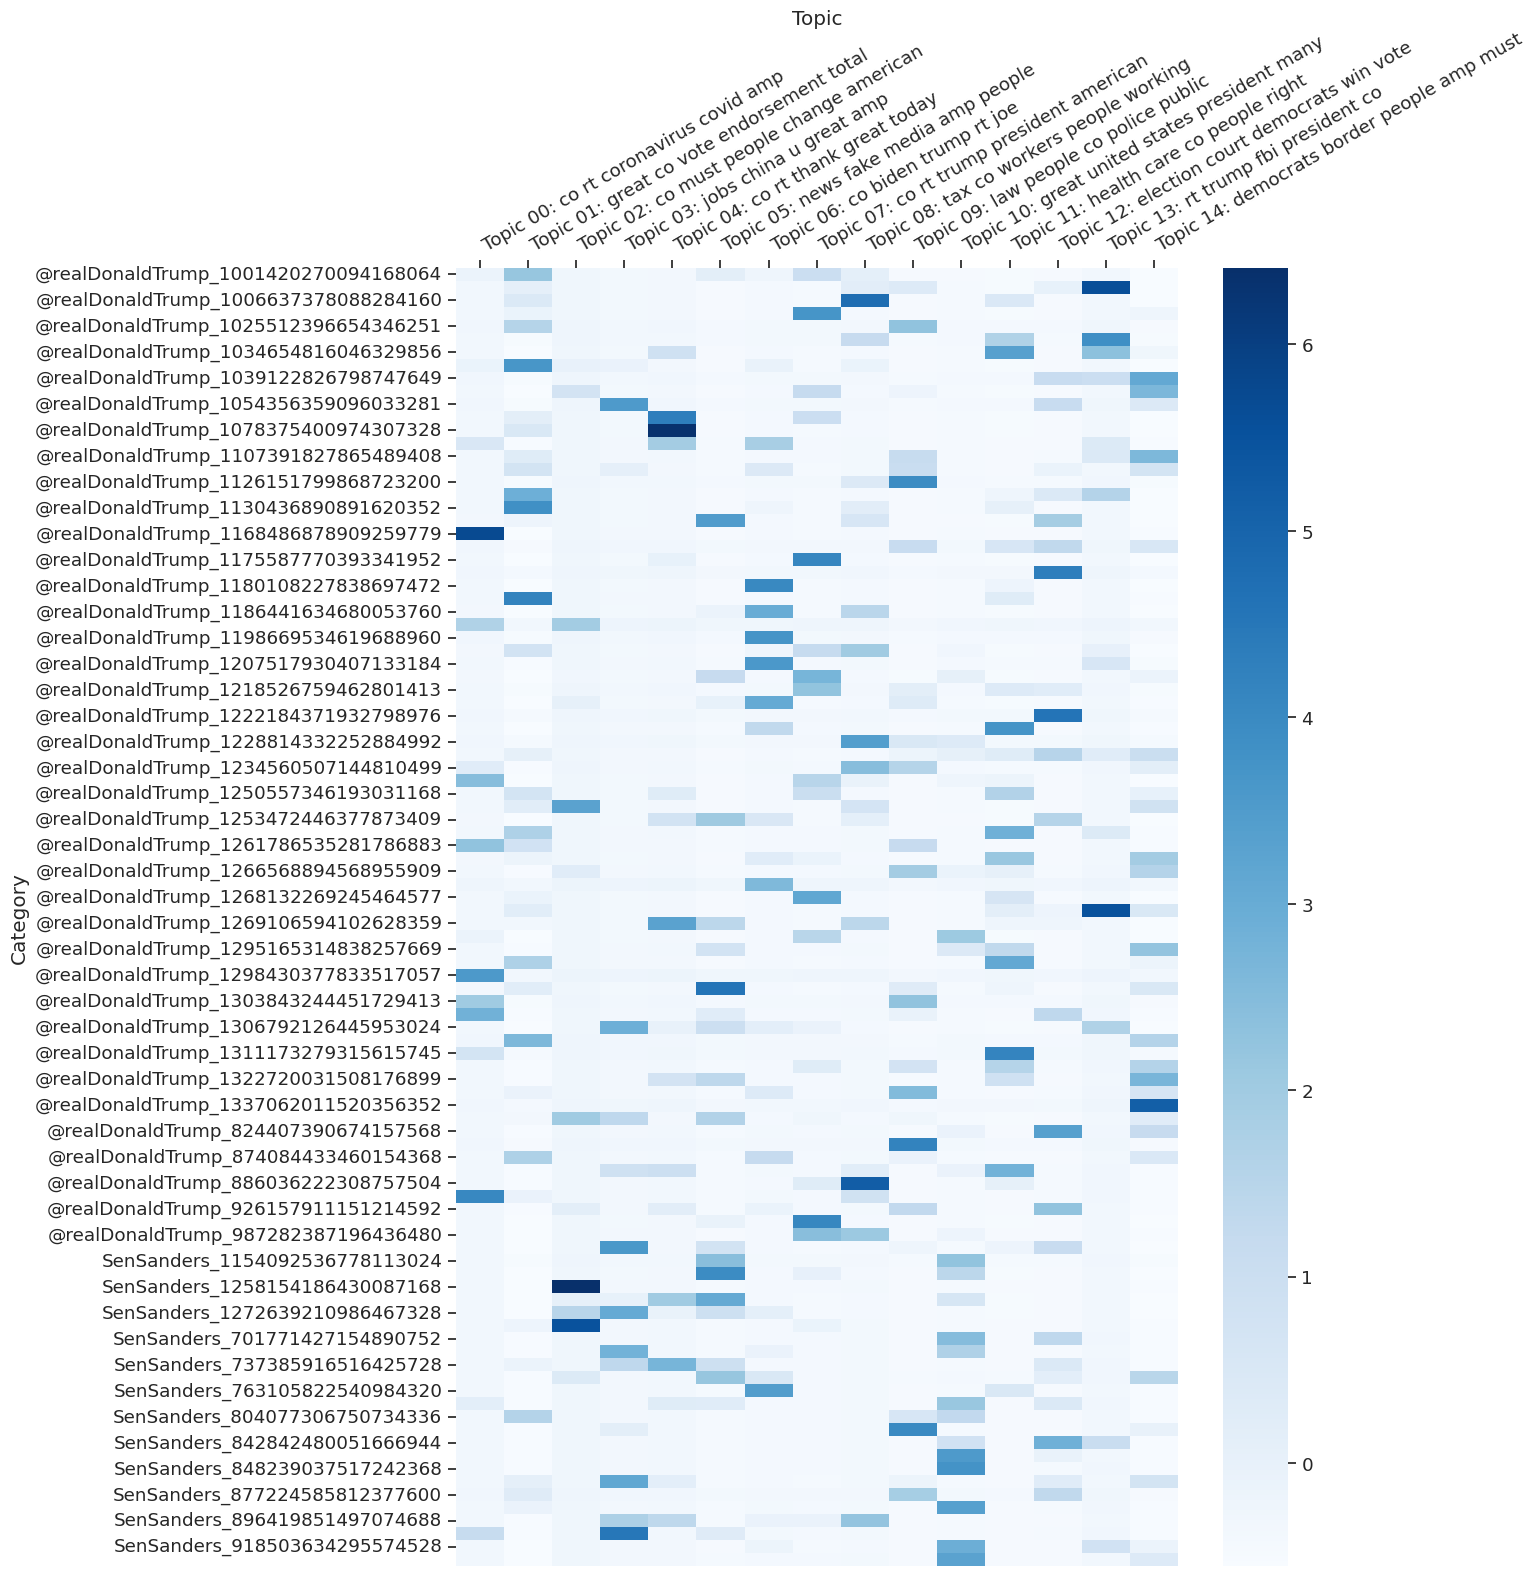

In [103]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot categories by topics heatmap
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map=sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

    # Show the final plot
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

# Plot the heatmap for the random sample of tweets
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map='Blues',
                                  dim=(15, 16))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [ ]:
# Q9 (words)

**Q9:**

The two politicians have different tendencies in their focus on various types of topics. One politician's particular focus on certain topics
contrasts with the generally lower level of attention given by the other politician.

If we focus on the darkest topics for each politician, Trump's darkest color appears in topic 04, possibly because Trump frequently expresses gratitude to his supporters and discusses his policies, as well as conversations about his honor and presidential activities. This may reflect his communication style and the themes he chooses to emphasize. Sanders' darkest color appears in topic 02, possibly because these topics (such as climate change, societal change, and national unity) are issues Sanders frequently focuses on and discusses.

From this heatmap, we can see the topics each president tends to focus on on Twitter.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [131]:
# X2 (code)


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)